<a href="https://colab.research.google.com/github/PereiraVagner/Data_Analysis/blob/main/Projeto_Airbnb_Vagner_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analista

**Nome:** Vagner de Andrade Pereira

**Data:** 06 de junho de 2023

# Sobre os Dados

Este conjunto de dados fornece uma visão abrangente dos preços do Airbnb em algumas das cidades europeias mais populares. Cada listagem é avaliada quanto a várias características, como tipos de quartos, classificações de limpeza e satisfação, número de quartos, distância do centro da cidade e muito mais, para obter uma compreensão detalhada dos preços do Airbnb tanto durante a semana quanto nos fins de semana. Utilizando métodos econométricos espaciais, analisamos e identificamos os determinantes dos preços do Airbnb nessas cidades.  

Fonte: https://www.kaggle.com/datasets/erikbruin/airbnb-amsterdam

# Requisitos

Pergunta de negócio: Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.

# Legenda de Dados


**Informações gerais do banco de dados:**

Este conjunto de dados contém dados de aluguel do Airbnb para a cidade de Amsterda, incluindo preço, tipo de quarto, status do anfitrião, comodidades e informações de localização. Esses dados podem ser usados para entender melhor os fatores que influenciam os preços de aluguel do Airbnb.


**Declaração das variáveis**


**realSum:** preço total  
**room_type:** tipo de quarto
**room_shared:** quarto compartilhado  
**room_private:** quarto privativo   
**person_capacity:** número máximo de pessoas permitidas na propriedade  
**host_is_superhost:** se o host é ou não um superhost  
**multi:** se o anunicio pertence ao host que tem entre 2-4 anuncios  
**biz:** se o anunicio pertence ao host que tem mais de 4 anuncios
**cleanliness_rating:** Classificação de limpeza  
**guest_satisfaction_overall:** atisfação geral do hóspede   
**bedrooms:** número de quartos  
**dist:** a distância do centro da cidade   
**metro_dist:** a distância da estação de metrô mais próxima
**attr_index:** índice de concentração de atrações perto do local do anúncio
**attr_index_norm:** índice de concentração de atrações perto do local do anúncio (0-100)

**rest_index:** índice de concentração de restaruntes no local da listagem
**attr_index_norm:** índice de concentração de restaruntes no normalizado(0-100)   
**lng:** Longitude   
**lat:** Latitude  

Fonte: https://zenodo.org/record/4446043#.Y9Y9ENJBwUE


# Instalação de bibliotecas e importação de módulos

*  **gcsfs:** É uma biblioteca Python que permite interagir com o Google Cloud Storage (GCS), um serviço de armazenamento de objetos do Google Cloud Platform. Com o gcsfs, você pode ler e gravar arquivos no GCS diretamente do seu código Python.

*  **pandera:** É uma biblioteca Python para validação de dados. Ela facilita a especificação e aplicação de regras de validação a estruturas de dados, como DataFrames do pandas. O pandera ajuda a verificar se os dados estão em conformidade com essas regras, identificando problemas de qualidade dos dados.


In [ ]:
# instação de pacote | package install
!pip install gcsfs
!pip install pandera

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 3.8 MB/s eta 0:00:00


In [ ]:
# importação de módulos | modules install
import os                              # Importar a biblioteca "os" para interagir com o sistema operacional
import pandas as pd                    # Importar a biblioteca "pandas" e atribuir um alias "pd"
import numpy as np                     # O numpy é uma biblioteca popular para computação numérica em Python, fornecendo suporte para matrizes multidimensionais, funções matemáticas avançadas e manipulação eficiente de dados numéricos
import pandera as pa                   # O pandera é uma biblioteca que adiciona recursos de validação de dados ao pandas, permitindo a definição de esquemas e regras para verificar a qualidade e integridade dos dados.
import seaborn as sns                  # biblioteca de visualização de dados e plotagem gráfica baseada no Metaplotlib
import matplotlib.pyplot as plt        # biblioteca de visualizaçao de dados e plotagem gráfica
import numpy as np                     # biblioteca para funções numericas, processamento de grandes e multi-dimnesionais arranjos e matrizes
from scipy.stats import chi2_contingency as sci_sta # biblioteca de rotinas cientificas, destinado a operar matrizes em numpy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import folium
import geopandas as gpd
from folium.plugins import MarkerCluster
from google.colab import drive         # Esse modulo fornece funcionalidades para interagir com a ferramenta escrever scritps do Google na nuvem
from  google.cloud import storage      # Esse módulo fornece funcionalidades para interagir com o serviço de armazenamento em nuvem do Google Cloud Platform (GCP)

In [ ]:
# Ignorar avisos | ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Extração


* Google Drive
* Google Cloud

In [ ]:
# Permite Acesso a sua GCP | GCP access
serviceAccount = '/content/superquiz-390016-d9b93ef8ae3f.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Aponta qual arquivo do bucket da GCP queremos pegar | point to file in the bucket
client = storage.Client()
bucket = client.get_bucket('padam-padam-project')
bucket.blob('airbnb.csv')
path = 'gs://padam-padam-project/Projeto_Airbnb/bruto/airbnb.csv'

In [ ]:
# Comando para conexão/abertura Google Drive | command to coonect/open Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Extração via Google Drive - via Google cloud usando variável PATH | variable to extract the Drive Path or the GCloud Path
#path = '/content/drive/MyDrive/SoulCode/Projeto_3_Airbnb/airbnb.csv'
df = pd.read_csv(path)

# Pré-Análise

In [ ]:
#Criação do Backup local do Dataframe | Local Backup Dataframe
dfbackup = df.copy()

In [ ]:
# Look up the file |  the Dataframe
df

Unnamed: 0      realSum        room_type  room_shared  room_private  \
0              0   194.033698     Private room        False          True   
1              1   344.245776     Private room        False          True   
2              2   264.101422     Private room        False          True   
3              3   433.529398     Private room        False          True   
4              4   485.552926     Private room        False          True   
...          ...          ...              ...          ...           ...   
1098        1098  2486.115342  Entire home/apt        False         False   
1099        1099   233.637194     Private room        False          True   
1100        1100   317.062311     Private room        False          True   
1101        1101  1812.855904  Entire home/apt        False         False   
1102        1102   258.008577      Shared room         True         False   

      person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                 2.0              False      1    0                10.0   
1                 4.0              False      0    0                 8.0   
2                 2.0              False      0    1                 9.0   
3                 4.0              False      0    1                 9.0   
4                 2.0               True      0    0                10.0   
...               ...                ...    ...  ...                 ...   
1098              2.0              False      0    0                10.0   
1099              2.0              False      1    0                10.0   
1100              2.0              False      1    0                10.0   
1101              4.0              False      0    0                 8.0   
1102              2.0              False      0    0                 8.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                           93.0         1  5.022964    2.539380   78.690379   
1                           85.0         1  0.488389    0.239404  631.176378   
2                           87.0         1  5.748312    3.651621   75.275877   
3                           90.0         2  0.384862    0.439876  493.272534   
4                           98.0         1  0.544738    0.318693  552.830324   
...                          ...       ...       ...         ...         ...   
1098                       100.0         1  2.375833    1.436054  181.198355   
1099                        90.0         1  4.719736    0.322263  108.024880   
1100                        92.0         1  0.598355    0.751993  440.476515   
1101                        84.0         5  1.943020    0.388532  257.948105   
1102                        90.0         1  0.280204    0.516217  533.962653   

      attr_index_norm  rest_index  rest_index_norm      lng       lat  
0            4.166708   98.253896         6.846473  4.90569  52.41772  
1           33.421209  837.280757        58.342928  4.90005  52.37432  
2            3.985908   95.386955         6.646700  4.97512  52.36103  
3           26.119108  875.033098        60.973565  4.89417  52.37663  
4           29.272733  815.305740        56.811677  4.90051  52.37508  
...               ...         ...              ...      ...       ...  
1098         9.594573  225.304203        15.699521  4.85869  52.37677  
1099         5.719989  134.775277         9.391335  4.83611  52.34910  
1100        23.323524  625.947562        43.616927  4.88897  52.37798  
1101        13.658524  336.589237        23.454022  4.90688  52.35794  
1102        28.273677  807.492307        56.267226  4.89295  52.37575  

[1103 rows x 20 columns]

In [ ]:
# Verificação dos detalhes do DF | Verification details Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

# Transformação | Transformation

**Verificações gerais e básicas de qualquer base de dados, se houver os casos abaixo:**

*  Escolher as possíveis colunas importantes para a análise;
*  Verificar se há colunas colunas iguais;
*  Verificação e tratamento de valores (ou observações) únicos;
*  Verificação e tratamento de duplicadas
*  Verificação e tatamento de inconsistência
*  Verificação e tratamento de valores nulos
*  Tradução/Renomeação
*  Transformação de tipos adequados dos dados
*  Garantia de qualidade e integridade dos dados

# Basic Checks

In [ ]:
# Verifica colunas iguais | Verifying possible equal Columns

#Colunas a serem verificadas |Columns names to be verified
tobe_checked = ['rest_index', 'attr_index_norm', 'attr_index']

#Verifying if the columns are equals to an specific column - 'rest_index_norm'
for column in tobe_checked:
  if (df['rest_index_norm'] == df[column]).all():
      print(f"The Columns {column} is equal to 'rest_index_norm'.")
  else:
      print(f"The Columns {column} is different from 'rest_index_norm'.")

The Columns rest_index is different from 'rest_index_norm'.
The Columns attr_index_norm is different from 'rest_index_norm'.
The Columns attr_index is different from 'rest_index_norm'.


In [ ]:
# Verificar dados nulos | Checling null data values
df.isnull().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [ ]:
# Verification Null
df.isna().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['realSum'])))

[128.88711831837463, 143.65055187120663, 144.82225294682823, 161.9290886509034, 165.67853209289248, 167.3189135987627, 175.75516134323811, 177.16120263398403, 178.0985634944813, 180.20762543060016, 181.8480069364704, 184.4257493028379, 188.17519274482692, 191.6902959716917, 192.8619970473133, 194.03369812293488, 196.6114404893024, 198.9548426405456, 199.89220350104284, 201.53258500691305, 202.70428608253465, 204.1103273732805, 205.2820284489021, 206.4537295245237, 208.7971316757669, 209.03147189089125, 210.2031729665128, 213.95261640850188, 215.12431748412348, 217.70205985049097, 218.63942071098825, 218.8737609261125, 221.2171630773557, 221.45150329248003, 225.66962716471772, 227.310008670588, 228.71604996133388, 230.82511189745276, 232.23115318819865, 233.63719447894456, 234.57455533944184, 237.85531835118223, 238.3239987814309, 239.4956998570525, 239.7300400721768, 241.1360813629227, 241.83910200829567, 242.07344222342, 243.2451432990416, 244.4168443746632, 245.5885454502848, 245.822

In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['rest_index'])))

[50.87731805018016, 51.2942317812557, 51.38730756405731, 51.79848966624199, 52.241711519718535, 52.24369564784055, 53.03613816779498, 53.51539663716002, 54.66234757805146, 54.83772630987247, 55.1362781486958, 55.778657957533255, 55.87916532488775, 56.215173265167415, 56.65809997328972, 56.692555144503935, 59.110877342291225, 59.418698804040666, 60.786849493915376, 61.31518864945101, 61.58947676356268, 61.79444653808432, 62.27816166591527, 62.94881745697451, 64.05170211659798, 65.58682710096944, 65.63442542441594, 66.06665769722035, 66.14093336351188, 66.17886984365747, 66.1789067836475, 66.92276559185258, 67.6390695005318, 67.75326378188876, 68.81784063877126, 69.41320156036069, 70.00912283759803, 70.82691489159629, 71.26567343646124, 71.84569009873942, 72.09730705335963, 72.18530625453653, 72.58583891886818, 73.55603585973807, 74.00294488620783, 74.22622300493848, 74.77225260103293, 75.28286020054959, 75.37802953057226, 75.70105653114125, 75.8124293547892, 75.94082162475716, 76.267373

In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['rest_index_norm'])))

[3.545204720017045, 3.5742558686210484, 3.580741523076774, 3.6093932835334464, 3.6402776199564073, 3.640415876858557, 3.695634411752903, 3.729029831417621, 3.80895102312167, 3.821171665476073, 3.841975187138168, 3.886737136423467, 3.8937406343828167, 3.917154151083281, 3.9480179213533257, 3.9504188072549207, 4.118930977288363, 4.140380419612353, 4.235715128070345, 4.272530560560858, 4.291643350976307, 4.305925939759352, 4.339631905797865, 4.3863641662056345, 4.463214756031835, 4.570184473559831, 4.573501193218304, 4.603619759849087, 4.608795395138263, 4.611438863654829, 4.611441437686482, 4.663274589647713, 4.713187676566162, 4.721144898384859, 4.795326145401816, 4.836811750976599, 4.878336402939124, 4.935321329836559, 4.965894656494007, 5.006311052003869, 5.023844083408473, 5.029975994352804, 5.057885686658303, 5.125490405341109, 5.156631669283051, 5.172190009831185, 5.21023813767145, 5.245818009827794, 5.252449545665914, 5.274958531811383, 5.282719150397624, 5.291665708489684, 5.3144

In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['cleanliness_rating'])))

[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['guest_satisfaction_overall'])))

[20.0, 47.0, 60.0, 65.0, 70.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['bedrooms'])))

[0, 1, 2, 3, 4, 5]


In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['metro_dist'])))

[0.0365299349690898, 0.0383546937010648, 0.0452202367146166, 0.0484628244968149, 0.0510521030736588, 0.0549307888656383, 0.0567934111340297, 0.0568915518360108, 0.0576981436516522, 0.0687184318413499, 0.0708805340183559, 0.0752365553720472, 0.0779166156732898, 0.0837770875750669, 0.1007740057793931, 0.1012318191726814, 0.1051871237368232, 0.1068345836161703, 0.1073010915114232, 0.1089403915386729, 0.1112526778129059, 0.1129651468266271, 0.119528106734041, 0.1210290090382624, 0.1220813873662373, 0.1245077819423133, 0.1256081740720538, 0.1266261912071032, 0.1269511243741907, 0.1304376878811783, 0.134728523844149, 0.1432629485982863, 0.1459595422340796, 0.147342513212529, 0.1504065294975317, 0.1530381646078639, 0.1534425610558035, 0.1548958309412227, 0.1572362826184581, 0.1581548155442651, 0.1659570897955379, 0.1661690453846391, 0.1673273754409381, 0.1733919684462981, 0.175794704274626, 0.176270148154478, 0.178057071188013, 0.1807682543430058, 0.1816822906160285, 0.1831750782063814, 0.186

In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['lng'])))

[4.7755, 4.77975, 4.78027, 4.78534, 4.78555, 4.785909999999999, 4.78696, 4.789219999999999, 4.78942, 4.78951, 4.79, 4.791180000000001, 4.79129, 4.79162, 4.79331, 4.79422, 4.7948900000000005, 4.79735, 4.79812, 4.798369999999999, 4.79853, 4.7994900000000005, 4.8015300000000005, 4.8016, 4.80245, 4.80277, 4.80314, 4.803669999999999, 4.80439, 4.80538, 4.806030000000001, 4.80772, 4.80823, 4.81, 4.81305, 4.81378, 4.81522, 4.81548, 4.81668, 4.817, 4.81905, 4.81944, 4.82065, 4.82073, 4.82115, 4.821619999999999, 4.82174, 4.824409999999999, 4.82535, 4.82587, 4.82664, 4.827, 4.82782, 4.82831, 4.8294, 4.83161, 4.83301, 4.83365, 4.83378, 4.833819999999999, 4.83453, 4.834980000000001, 4.8352900000000005, 4.83556, 4.83576, 4.83588, 4.83611, 4.83758, 4.8381, 4.83906, 4.83907, 4.83968, 4.83969, 4.8398, 4.83983, 4.83995, 4.84019, 4.84034, 4.84054, 4.841, 4.84374, 4.84393, 4.84415, 4.84422, 4.8445, 4.84474, 4.84481, 4.845, 4.84563, 4.84565, 4.84631, 4.84653, 4.846769999999999, 4.84719, 4.84729, 4.84736, 4

In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['lat'])))

[52.2911, 52.2915, 52.293040000000005, 52.29306, 52.2963, 52.2972, 52.2977, 52.29838, 52.29921, 52.299240000000005, 52.30013, 52.3006, 52.30116, 52.30598, 52.30652, 52.30676, 52.30713, 52.30793, 52.30865, 52.3099, 52.31006, 52.3101, 52.31015, 52.31028, 52.31044, 52.31102, 52.311440000000005, 52.31161, 52.31241, 52.31577, 52.31603, 52.31681, 52.31694, 52.317040000000006, 52.31778, 52.318090000000005, 52.3186, 52.32125, 52.322, 52.32206, 52.3227, 52.32278, 52.32435, 52.325, 52.32527, 52.3255, 52.32582, 52.32693, 52.32698, 52.328990000000005, 52.32989, 52.33072, 52.331, 52.33217, 52.33269, 52.3341, 52.33435, 52.33652, 52.33792, 52.33854, 52.338640000000005, 52.33918, 52.33952, 52.33954, 52.33963, 52.33997, 52.34038, 52.34085, 52.34092, 52.34101, 52.34115, 52.34116, 52.34143, 52.34151, 52.34155, 52.34156, 52.34158, 52.3417, 52.34177, 52.34187, 52.34188, 52.34199, 52.342, 52.34234, 52.342490000000005, 52.34251, 52.34259, 52.342690000000005, 52.34271, 52.34291, 52.343, 52.3432, 52.34357, 52.

In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['room_type'])))

['Entire home/apt', 'Private room', 'Shared room']


In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['room_shared'])))

[False, True]


In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['room_private'])))

[False, True]


In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['person_capacity'])))

[2.0, 3.0, 4.0, 5.0, 6.0]


In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['host_is_superhost'])))

[False, True]


In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['multi'])))

[0, 1]


In [ ]:
# Verification Null values each Column
print(sorted(pd.unique(df['biz'])))

[0, 1]


# Tipagem conversão | Type Tranformation

In [ ]:
# Trocando o tipo da coluna para inteiro (antes float) | Change column type to int(previous float)
df['person_capacity'] = df['person_capacity'].astype(int)

In [ ]:
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity                 int64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

# Colunas utilizadas | Columns to be used

In [ ]:
# Metodo rename para renomear colunas | Method to rename the columns
# inplace=True does force the change
#df.rename(columns={'room_type':'tipo_quarto','room_shared':'compartilhado','person_capacity':'capacidade','bedrooms':'qnt_quartos','cleanliness_rating':'nota_limpeza','host_is_superhost':'superhost','guest_satisfaction_overall':'satisfacao','dist':'distancia_centro','metro_dist':'distancia_metro','realSum':'preco_total','lat':'latitude','lng':'longitude'}, inplace = True)

In [ ]:
df.rename(columns={'realSum':'price_2_nights'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   price_2_nights              1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   int64  
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [ ]:
# Metodo para verificar valores na coluna room_type | Method to verify values of the column
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# Checagem redundante sobre os quartos compartilhados e privados | Redudant room check
# Pois não havendo incosistências é possível dropar as colunas por serem redundantes | If they are consistent and redudant it will be dropped
ftroom = df.room_type == 'Private room'
ftshared = df.room_shared == True
df.loc[ftroom & ftshared]

Empty DataFrame
Columns: [Unnamed: 0, price_2_nights, room_type, room_shared, room_private, person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, lat]
Index: []

In [ ]:
# Delete Columns
#df.drop([])

**Colunas escolhidas | Columns choosed**

price_2_nights,

room_type,

person_capacity,

host_is_superhost,

multi,

biz,

cleanliness_rating,

guest_satisfaction_overall,

bedrooms,

metro_dist,

attr_index_norm,

rest_index_norm,

In [ ]:
# Criando novo DF com as colunas escolhidas | Create new DF with the choosen columns
df_final = df[['price_2_nights',
               'room_type',
               'person_capacity',
               'host_is_superhost',
               'multi',
               'biz',
               'cleanliness_rating',
               'guest_satisfaction_overall',
               'bedrooms',
               'dist',
               'metro_dist',
               'attr_index_norm',
               'rest_index_norm']]

In [ ]:
# Criando novo DF com as colunas escolhidas para plot com mapas | Create new DF with the choosen columns to plot maps
df_bkp_maps = df[['price_2_nights',
               'room_type',
               'person_capacity',
               'host_is_superhost',
               'multi',
               'biz',
               'cleanliness_rating',
               'guest_satisfaction_overall',
               'bedrooms',
               'dist',
               'metro_dist',
               'attr_index_norm',
               'rest_index_norm',
               'lng',
               'lat'   ]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   price_2_nights              1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   int64  
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [ ]:
#Contagem dos valores de apenas uma coluna | Count the values of one column
df_final['cleanliness_rating'].value_counts()

#Porcentagem de 9 e 10
total_count = len(df_final['cleanliness_rating'])
desired_values = [9, 10]
num_count = df_final['cleanliness_rating'].isin(desired_values).sum()
percentage = (num_count/total_count) * 100

print(f'A porcentagem de 9 e 10 é: {percentage}')


A porcentagem de 9 e 10 é: 90.0271985494107


In [ ]:
# Contagem laço repetição dos valores de cada coluna | Loop count values of each column
for column in df_final:
  count = df_final[column].value_counts()
  print(f'Count for column {column}: ')
  print(count)
  print()

Count for column price_2_nights: 
614.440044     15
307.220022     11
393.457221     11
196.611440     11
209.031472     10
               ..
604.597755      1
521.172638      1
744.498863      1
1804.185316     1
1812.855904     1
Name: price_2_nights, Length: 534, dtype: int64

Count for column room_type: 
Private room       559
Entire home/apt    538
Shared room          6
Name: room_type, dtype: int64

Count for column person_capacity: 
2    656
4    333
3     79
6     24
5     11
Name: person_capacity, dtype: int64

Count for column host_is_superhost: 
False    780
True     323
Name: host_is_superhost, dtype: int64

Count for column multi: 
0    763
1    340
Name: multi, dtype: int64

Count for column biz: 
0    976
1    127
Name: biz, dtype: int64

Count for column cleanliness_rating: 
10.0    659
9.0     334
8.0      87
7.0      11
6.0       9
4.0       2
5.0       1
Name: cleanliness_rating, dtype: int64

Count for column guest_satisfaction_overall: 
100.0    190
98.0     122
9

In [ ]:
df_final.round(2)

price_2_nights        room_type  person_capacity  host_is_superhost  \
0             194.03     Private room                2              False   
1             344.25     Private room                4              False   
2             264.10     Private room                2              False   
3             433.53     Private room                4              False   
4             485.55     Private room                2               True   
...              ...              ...              ...                ...   
1098         2486.12  Entire home/apt                2              False   
1099          233.64     Private room                2              False   
1100          317.06     Private room                2              False   
1101         1812.86  Entire home/apt                4              False   
1102          258.01      Shared room                2              False   

      multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  \
0         1    0                10.0                        93.0         1   
1         0    0                 8.0                        85.0         1   
2         0    1                 9.0                        87.0         1   
3         0    1                 9.0                        90.0         2   
4         0    0                10.0                        98.0         1   
...     ...  ...                 ...                         ...       ...   
1098      0    0                10.0                       100.0         1   
1099      1    0                10.0                        90.0         1   
1100      1    0                10.0                        92.0         1   
1101      0    0                 8.0                        84.0         5   
1102      0    0                 8.0                        90.0         1   

      dist  metro_dist  attr_index_norm  rest_index_norm  
0     5.02        2.54             4.17             6.85  
1     0.49        0.24            33.42            58.34  
2     5.75        3.65             3.99             6.65  
3     0.38        0.44            26.12            60.97  
4     0.54        0.32            29.27            56.81  
...    ...         ...              ...              ...  
1098  2.38        1.44             9.59            15.70  
1099  4.72        0.32             5.72             9.39  
1100  0.60        0.75            23.32            43.62  
1101  1.94        0.39            13.66            23.45  
1102  0.28        0.52            28.27            56.27  

[1103 rows x 13 columns]

# Qualidade dos Dados | Data reliability / uniformity

In [ ]:
# Verificar a tipagem das colunas | Check the type of the columns
df_final.dtypes

price_2_nights                float64
room_type                      object
person_capacity                 int64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index_norm               float64
rest_index_norm               float64
dtype: object

In [ ]:
# Definir o esquema de validação
schema = pa.DataFrameSchema({'price_2_nights': pa.Column(pa.Float),
                            'room_type': pa.Column(pa.String),
                            'person_capacity': pa.Column(pa.Int),
                            'host_is_superhost': pa.Column(pa.Bool),
                            'multi': pa.Column(pa.Int),
                            'biz': pa.Column(pa.Int),
                            'cleanliness_rating': pa.Column(pa.Float),
                            'guest_satisfaction_overall': pa.Column(pa.Float),
                            'bedrooms': pa.Column(pa.Int),
                            'dist': pa.Column(pa.Float),
                            'metro_dist': pa.Column(pa.Float),
                            'attr_index_norm': pa.Column(pa.Float),
                            'rest_index_norm': pa.Column(pa.Float)
                            })

# Validar o DataFrame
schema.validate(df_final)

price_2_nights        room_type  person_capacity  host_is_superhost  \
0         194.033698     Private room                2              False   
1         344.245776     Private room                4              False   
2         264.101422     Private room                2              False   
3         433.529398     Private room                4              False   
4         485.552926     Private room                2               True   
...              ...              ...              ...                ...   
1098     2486.115342  Entire home/apt                2              False   
1099      233.637194     Private room                2              False   
1100      317.062311     Private room                2              False   
1101     1812.855904  Entire home/apt                4              False   
1102      258.008577      Shared room                2              False   

      multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  \
0         1    0                10.0                        93.0         1   
1         0    0                 8.0                        85.0         1   
2         0    1                 9.0                        87.0         1   
3         0    1                 9.0                        90.0         2   
4         0    0                10.0                        98.0         1   
...     ...  ...                 ...                         ...       ...   
1098      0    0                10.0                       100.0         1   
1099      1    0                10.0                        90.0         1   
1100      1    0                10.0                        92.0         1   
1101      0    0                 8.0                        84.0         5   
1102      0    0                 8.0                        90.0         1   

          dist  metro_dist  attr_index_norm  rest_index_norm  
0     5.022964    2.539380         4.166708         6.846473  
1     0.488389    0.239404        33.421209        58.342928  
2     5.748312    3.651621         3.985908         6.646700  
3     0.384862    0.439876        26.119108        60.973565  
4     0.544738    0.318693        29.272733        56.811677  
...        ...         ...              ...              ...  
1098  2.375833    1.436054         9.594573        15.699521  
1099  4.719736    0.322263         5.719989         9.391335  
1100  0.598355    0.751993        23.323524        43.616927  
1101  1.943020    0.388532        13.658524        23.454022  
1102  0.280204    0.516217        28.273677        56.267226  

[1103 rows x 13 columns]

In [ ]:
df_final_bkp = df_final.copy()

# Carregamento DF no Google Cloud | Load the DF into Google Cloud

In [ ]:
# Carregamento no bucket do Google Cloud | Load into the bucket Google Cloud
df_final.to_csv('gs://padam-padam-project/Projeto_Airbnb/tratado/airbnb_tratado.csv', index=False) # salva no bucket

# Analise | Analyses

**Location impact directly in the price?**

**Cleanliness rating X guest satisfatcion?**

**Attractions and restaurants X guest satisfatcion**

**Private Room / Shared room / Entire home/apt X guest satisfaction**

**Price X satisfaction**

**Super host X guest satisfacton**

**Metro distance X guest satisfaction**


Dicionário do describe:

PT
* contagem: Número de valores não nulos
* média: valor médio (média)
* std: desvio padrão
* min: Valor mínimo
* 25%: Primeiro quartil (25º percentil)
* 50%: Mediana (segundo quartil ou percentil 50)
* 75%: Terceiro quartil (75º percentil)
* máx: valor máximo


EN
*   count: Number of non-null values
*   mean: Mean (average) value
*   std: Standard deviation
*   min: Minimum value
*   25%: First quartile (25th percentile)
*   50%: Median (second quartile or 50th percentile)   
*   75%: Third quartile (75th percentile)
*   max: Maximum value


In [ ]:
df_final.describe().round(2)

price_2_nights  person_capacity    multi      biz  cleanliness_rating  \
count         1103.00          1103.00  1103.00  1103.00             1103.00   
mean           545.02             2.79     0.31     0.12                9.46   
std            416.97             1.04     0.46     0.32                0.80   
min            128.89             2.00     0.00     0.00                4.00   
25%            309.80             2.00     0.00     0.00                9.00   
50%            430.25             2.00     0.00     0.00               10.00   
75%            657.32             4.00     1.00     0.00               10.00   
max           7782.91             6.00     1.00     1.00               10.00   

       guest_satisfaction_overall  bedrooms     dist  metro_dist  \
count                     1103.00   1103.00  1103.00     1103.00   
mean                        94.36      1.28     2.84        1.09   
std                          6.09      0.74     2.12        0.84   
min                         20.00      0.00     0.02        0.04   
25%                         92.00      1.00     1.30        0.46   
50%                         96.00      1.00     2.34        0.86   
75%                         98.00      2.00     3.65        1.51   
max                        100.00      5.00    11.19        4.41   

       attr_index_norm  rest_index_norm  
count          1103.00          1103.00  
mean             14.35            23.80  
std              10.43            16.49  
min               2.17             3.55  
25%               6.77            11.39  
50%              11.02            18.14  
75%              20.46            32.70  
max             100.00           100.00

In [ ]:
# Criando realação entre os dados qualitativos e quantitavios, mapeando e transformando eles
# Selecionando atributos/colunas | Selecting the desired attributes
attributes = ['price_2_nights', 'room_type', 'person_capacity', 'host_is_superhost', 'multi', 'biz',
              'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
              'attr_index_norm', 'rest_index_norm']

# Criando DF com os atributos | Creating a DataFrame with the selected attributes
df_selected_room = df_final[attributes]
df_selected_host = df_final[attributes]

# Convertendo qualitativo para numerico | Encoding the qualitative attribute 'room_type' into numerical values
room_type_mapping = {'private room': 0, 'shared room': 1, 'entire home': 2}
superhost_mapping = {'False': 0, 'True': 1}
df_selected_room['room_type_encoded'] = df_selected_room['room_type'].map(room_type_mapping)
df_selected_host['super_host_encoded'] = df_selected_host['host_is_superhost'].map(superhost_mapping)

# Calculo Matrix de correção | Calculating the correlation matrix
correlation_matrix_room = df_selected_room.corr()
correlation_matrix_host = df_selected_host.corr()

# Visualização da Matrix | Displaying the correlation matrix
print('Correlação Entre todos os atributos')
print(correlation_matrix_room.round(2))
print('-------------------------')
print('Correlação com o Host')
print(correlation_matrix_host.round(2))


Correlação Entre todos os atributos
                            price_2_nights  person_capacity  \
price_2_nights                        1.00             0.53   
person_capacity                       0.53             1.00   
host_is_superhost                    -0.06            -0.09   
multi                                -0.10            -0.14   
biz                                  -0.03             0.08   
cleanliness_rating                    0.02            -0.07   
guest_satisfaction_overall            0.14             0.04   
bedrooms                              0.49             0.66   
dist                                 -0.26            -0.05   
metro_dist                           -0.14            -0.00   
attr_index_norm                       0.24             0.04   
rest_index_norm                       0.21             0.01   
room_type_encoded                      NaN              NaN   

                            host_is_superhost  multi   biz  \
price_2_nights     

In [ ]:
#Testing Hipoteses com Replace | Same Mapping scripting, using replace in the DF
#  Subsitituindo | Replace True with 1 and False with 0 in the 'host_is_superhost' column
df_final['host_is_superhost'] = df_final['host_is_superhost'].replace({True: 1, False: 0})

In [ ]:
df_final['host_is_superhost'] = df_final['host_is_superhost'].astype(int)
df_final.dtypes

price_2_nights                float64
room_type                      object
person_capacity                 int64
host_is_superhost               int64
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index_norm               float64
rest_index_norm               float64
dtype: object

In [ ]:
# Selecionando os atributos | Selecting the desired attributes
attributes = ['price_2_nights', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
              'bedrooms', 'dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm']

# Criando a matrix de correlação | Creating a correlation matrix
correlation_matrix = df_final[attributes].corr()
# Mostra a tablea de correlação | Display the Correlation table
correlation_matrix.round(2)


price_2_nights  person_capacity  \
price_2_nights                        1.00             0.53   
person_capacity                       0.53             1.00   
host_is_superhost                    -0.06            -0.09   
multi                                -0.10            -0.14   
biz                                  -0.03             0.08   
cleanliness_rating                    0.02            -0.07   
guest_satisfaction_overall            0.14             0.04   
bedrooms                              0.49             0.66   
dist                                 -0.26            -0.05   
metro_dist                           -0.14            -0.00   
attr_index_norm                       0.24             0.04   
rest_index_norm                       0.21             0.01   

                            host_is_superhost  multi   biz  \
price_2_nights                          -0.06  -0.10 -0.03   
person_capacity                         -0.09  -0.14  0.08   
host_is_superhost                        1.00   0.10 -0.14   
multi                                    0.10   1.00 -0.24   
biz                                     -0.14  -0.24  1.00   
cleanliness_rating                       0.31   0.01 -0.06   
guest_satisfaction_overall               0.30  -0.05 -0.12   
bedrooms                                -0.06  -0.11 -0.04   
dist                                     0.02   0.01 -0.04   
metro_dist                               0.04  -0.03 -0.04   
attr_index_norm                         -0.02   0.00  0.10   
rest_index_norm                         -0.02   0.05  0.10   

                            cleanliness_rating  guest_satisfaction_overall  \
price_2_nights                            0.02                        0.14   
person_capacity                          -0.07                        0.04   
host_is_superhost                         0.31                        0.30   
multi                                     0.01                       -0.05   
biz                                      -0.06                       -0.12   
cleanliness_rating                        1.00                        0.65   
guest_satisfaction_overall                0.65                        1.00   
bedrooms                                 -0.02                        0.10   
dist                                     -0.02                       -0.06   
metro_dist                                0.02                        0.05   
attr_index_norm                          -0.01                        0.01   
rest_index_norm                           0.01                       -0.00   

                            bedrooms  dist  metro_dist  attr_index_norm  \
price_2_nights                  0.49 -0.26       -0.14             0.24   
person_capacity                 0.66 -0.05       -0.00             0.04   
host_is_superhost              -0.06  0.02        0.04            -0.02   
multi                          -0.11  0.01       -0.03             0.00   
biz                            -0.04 -0.04       -0.04             0.10   
cleanliness_rating             -0.02 -0.02        0.02            -0.01   
guest_satisfaction_overall      0.10 -0.06        0.05             0.01   
bedrooms                        1.00  0.02        0.02            -0.02   
dist                            0.02  1.00        0.41            -0.71   
metro_dist                      0.02  0.41        1.00            -0.47   
attr_index_norm                -0.02 -0.71       -0.47             1.00   
rest_index_norm                -0.07 -0.75       -0.49             0.86   

                            rest_index_norm  
price_2_nights                         0.21  
person_capacity                        0.01  
host_is_superhost                     -0.02  
multi                                  0.05  
biz                                    0.10  
cleanliness_rating                     0.01  
guest_satisfaction_overall            -0.00  
bedrooms                              -0.0

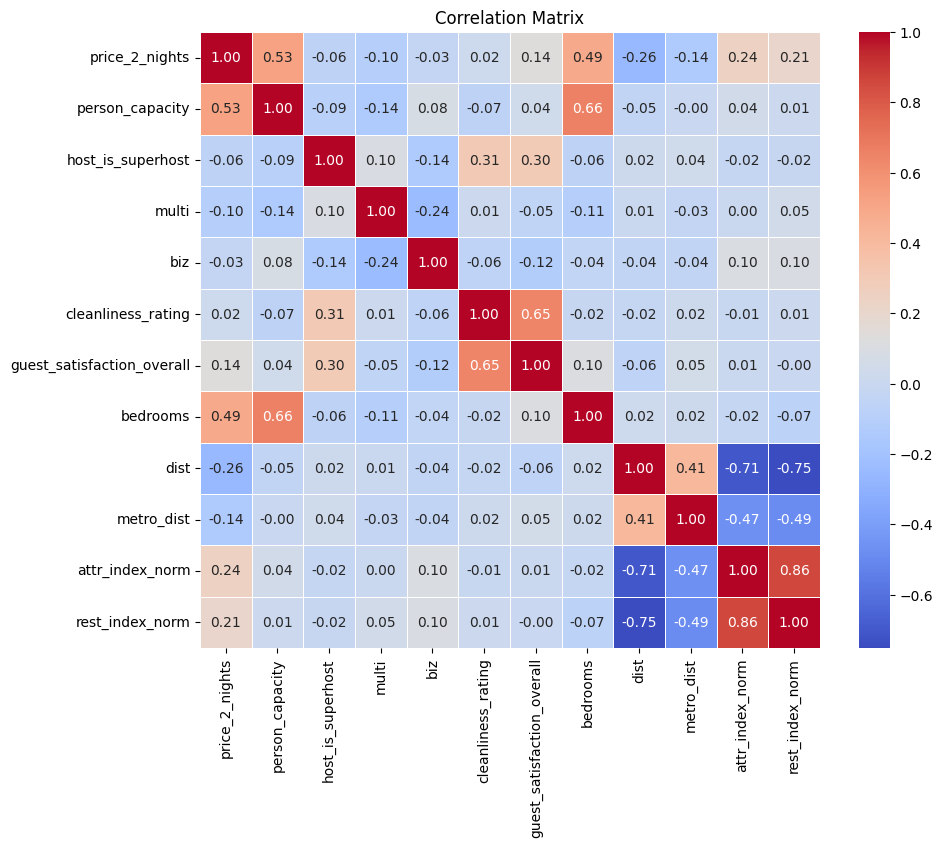

In [ ]:
# Criando o grafico matrix correlação| Generating the plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Analise para ver se distancia do centro interfere no preço
# Calculate the 80th percentile value of 'price_2_nights'
price_quart = df_final['price_2_nights'].quantile(0.0)

# Filter the DataFrame to include only the values of 'price_2_nights'
filtered_df = df_final[df_final['price_2_nights'] >= price_quart]

# Check the correlation between 'price_2_nights' and 'dist'
correlation = filtered_df['price_2_nights'].corr(filtered_df['dist'])

# Print the correlation value
print(f"Correlation between 'price_2_nights' and 'dist': {correlation}")


Correlation between 'price_2_nights' and 'dist': -0.2586916859894173


In [ ]:
# Filtro Entre SuperHost, Cleanliness e Guest_Satisfaction
ft_host_is_superhost = df_final_bkp.host_is_superhost == 1
ft_cleanliness_rating = df_final_bkp.cleanliness_rating >= 9
ft_guest_satisfaction_overall = df_final_bkp.guest_satisfaction_overall >= 90


df_ft = df_final_bkp.loc[ft_host_is_superhost & ft_cleanliness_rating & ft_guest_satisfaction_overall]
df_ft

price_2_nights        room_type  person_capacity  host_is_superhost  \
4         485.552926     Private room                2                  1   
7        2771.307384  Entire home/apt                4                  1   
11        319.640053     Private room                2                  1   
13        552.808567  Entire home/apt                2                  1   
15        368.851499     Private room                2                  1   
...              ...              ...              ...                ...   
1086      276.287114  Entire home/apt                2                  1   
1088     1062.967216  Entire home/apt                4                  1   
1092      792.772948  Entire home/apt                4                  1   
1094      228.716050     Private room                3                  1   
1097      356.197127     Private room                4                  1   

      multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  \
4         0    0                10.0                        98.0         1   
7         0    0                10.0                       100.0         3   
11        1    0                10.0                        97.0         1   
13        0    0                10.0                       100.0         1   
15        0    0                10.0                        98.0         1   
...     ...  ...                 ...                         ...       ...   
1086      0    0                10.0                        98.0         1   
1088      1    0                 9.0                        92.0         2   
1092      0    0                10.0                        98.0         2   
1094      0    0                10.0                        98.0         1   
1097      0    0                10.0                        95.0         1   

          dist  metro_dist  attr_index_norm  rest_index_norm  
4     0.544738    0.318693        29.272733        56.811677  
7     1.686807    1.458404        11.056528        18.975219  
11    2.182707    1.590381        10.140123        15.977773  
13    1.305494    1.342162        17.222519        27.239314  
15    1.031101    0.557885        19.058105        30.656388  
...        ...         ...              ...              ...  
1086  3.839556    0.754154         7.915598        12.995131  
1088  0.832102    0.960239        29.090407        41.751454  
1092  1.360556    0.466626        19.083111        32.806557  
1094  7.628766    2.927773         3.271936         5.328303  
1097  2.169253    0.212113        11.883906        20.332049  

[316 rows x 13 columns]

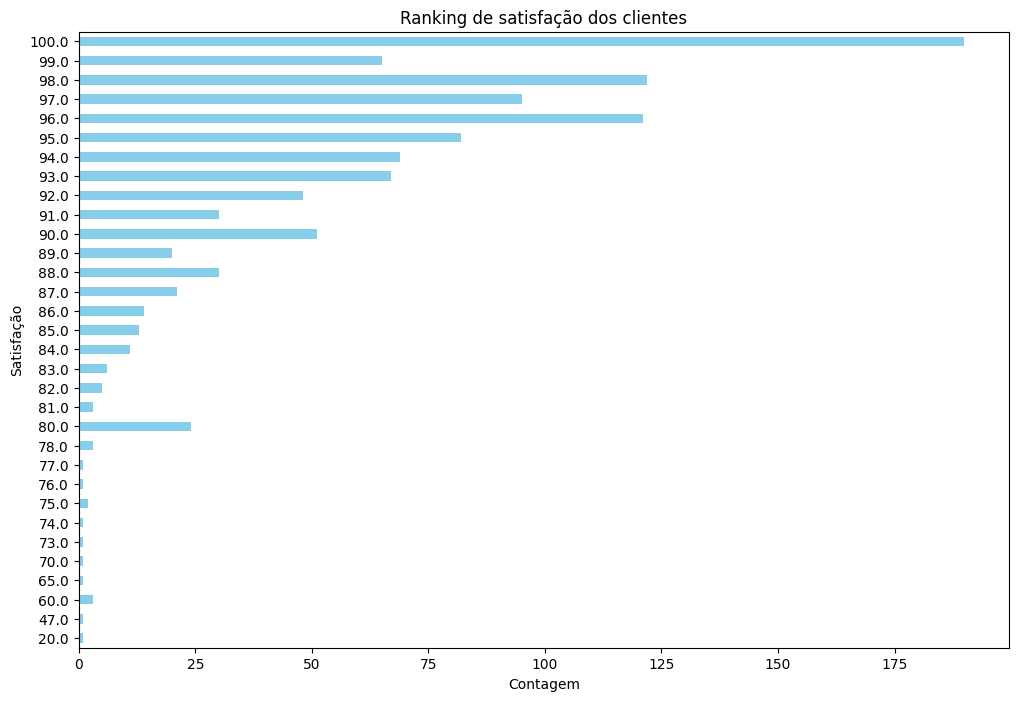

In [ ]:
# Gráfico de barras horizontal
df_final.groupby(['guest_satisfaction_overall']).size().plot.barh(figsize=(12,8), color=['skyblue'])
plt.xlabel('Contagem')
plt.ylabel('Satisfação')
plt.title('Ranking de satisfação dos clientes')
plt.show()

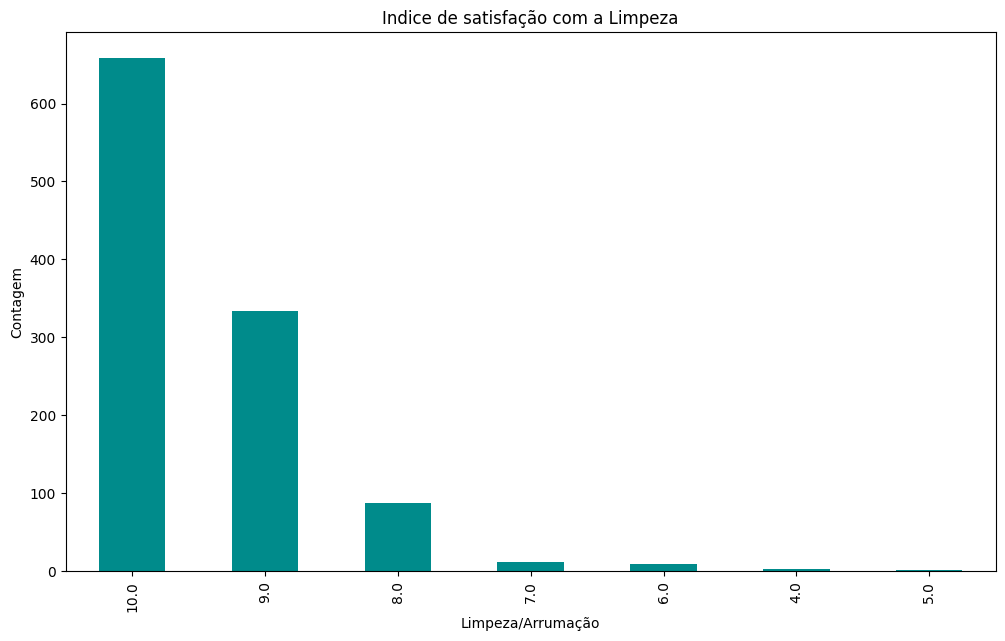

In [ ]:
# Gráfico de barras vertical
df_final.groupby('cleanliness_rating').size().sort_values(ascending=False).plot.bar(figsize=(12,7), color=['DarkCyan'])
plt.xlabel('Limpeza/Arrumação')
plt.ylabel('Contagem')
plt.title('Indice de satisfação com a Limpeza')
plt.show()

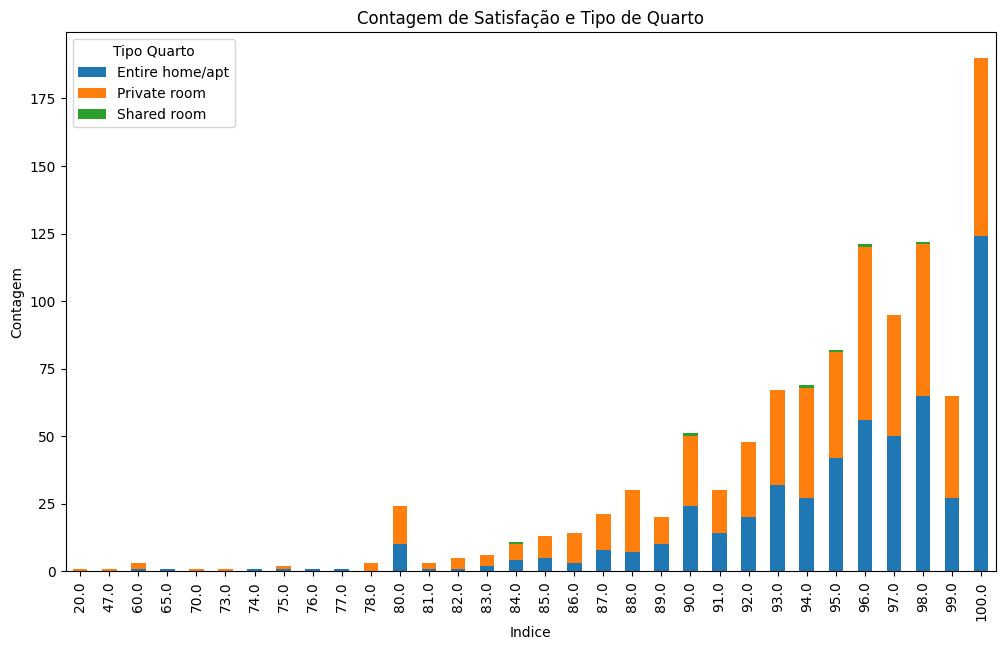

In [ ]:
# Gráfico de barras empilhadas da contagem de ocorrências por 'tipo de quarto' e 'satisfação':
df_final.groupby(['guest_satisfaction_overall', 'room_type']).size().unstack().plot(kind='bar', figsize=(12,7), stacked=True)
plt.xlabel('Indice')
plt.ylabel('Contagem')
plt.title('Contagem de Satisfação e Tipo de Quarto')
plt.legend(title='Tipo Quarto')
plt.show()

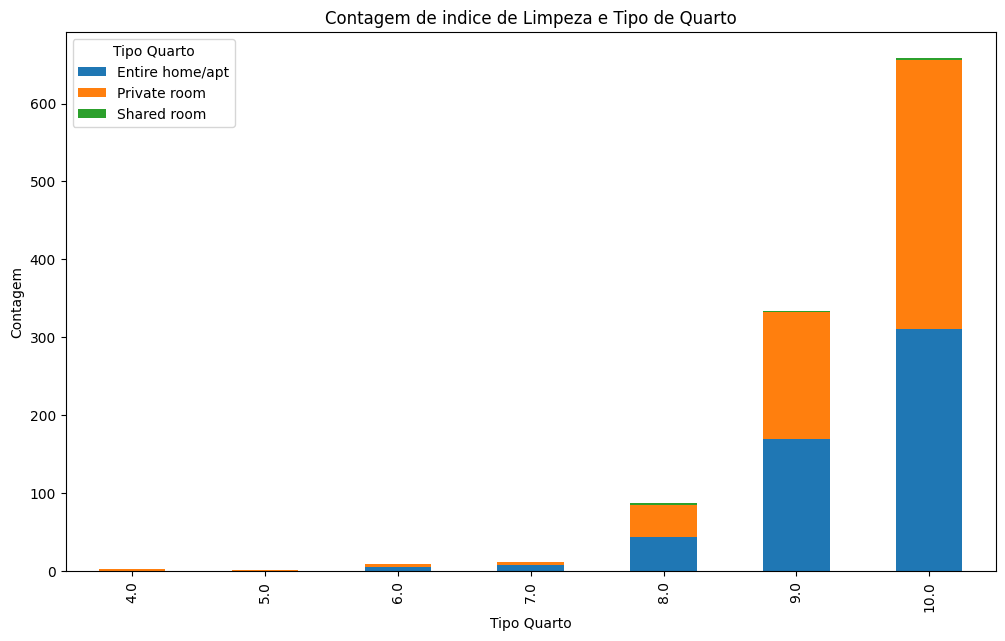

In [ ]:
# Gráfico de barras empilhadas da contagem de ocorrências por 'tipo de quarto' e 'Limpeza':
df_final.groupby(['cleanliness_rating', 'room_type']).size().unstack().plot(kind='bar', figsize=(12,7), stacked=True)
plt.xlabel('Tipo Quarto')
plt.ylabel('Contagem')
plt.title('Contagem de indice de Limpeza e Tipo de Quarto')
plt.legend(title='Tipo Quarto')
plt.show()

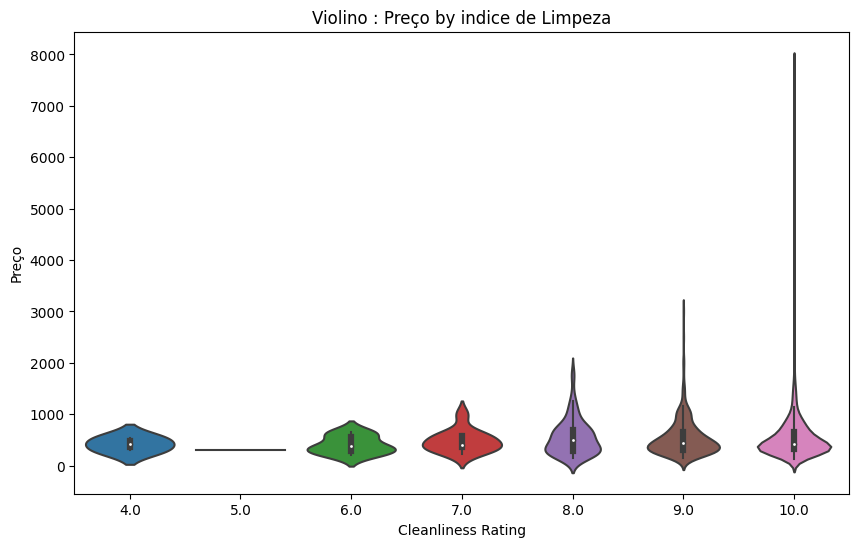

In [ ]:
# Grafico Violino entre Preço e Indice de limpeza | Violin plot Price by Cleanliness Rating
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_bkp_maps['cleanliness_rating'], y=df_bkp_maps['price_2_nights'])
plt.xlabel('Cleanliness Rating')
plt.ylabel('Preço')
plt.title('Violino : Preço by indice de Limpeza')
plt.show()

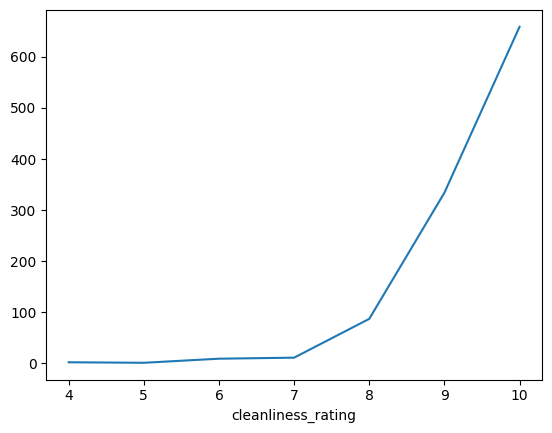

In [ ]:
# Gráfico de linha Indice de limpeza | Line Plot for Cleanliness rating
plt_line = df_bkp_maps.groupby(df_bkp_maps['cleanliness_rating']).size().plot.line()
#plt_line = df_bkp_maps.plot.line(x='cleanliness_rating', y='guest_satisfaction_overall')

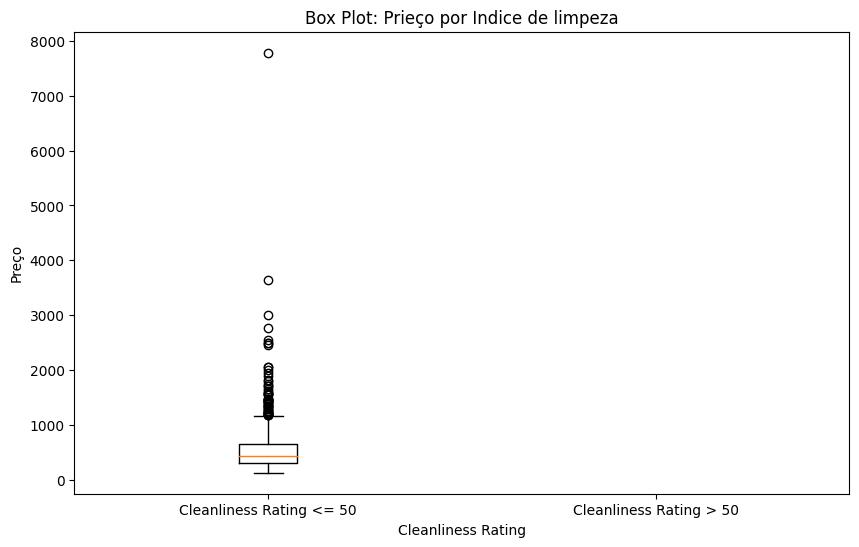

In [ ]:
# Box Plot Preço e Indice de Limpeza com filtros | Boxplot Price by Cleanliness Rating with filter
plt.figure(figsize=(10, 6))
plt.boxplot([df_bkp_maps[df_bkp_maps['cleanliness_rating'] <= 50]['price_2_nights'],
             df_bkp_maps[df_bkp_maps['cleanliness_rating'] > 50]['price_2_nights']],
            labels=['Cleanliness Rating <= 50', 'Cleanliness Rating > 50'])
plt.xlabel('Cleanliness Rating')
plt.ylabel('Preço')
plt.title('Box Plot: Prieço por Indice de limpeza')
plt.show()

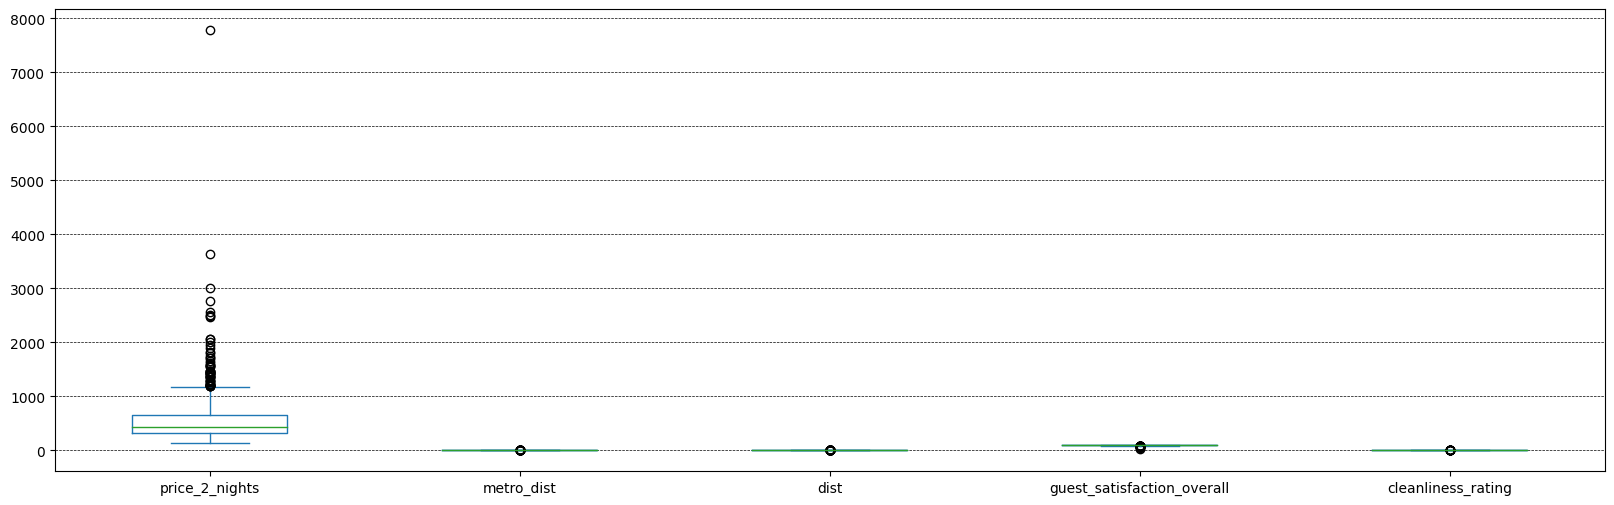

In [ ]:
# BoxPlot Dispersão atributos selecionados | Boxplot for selected attributes
df_final_bkp[['price_2_nights',
                 'metro_dist',
                 'dist',
                 'guest_satisfaction_overall',
                 'cleanliness_rating',
                 ]].plot.box(figsize=(20,6))

plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y')
plt.show()


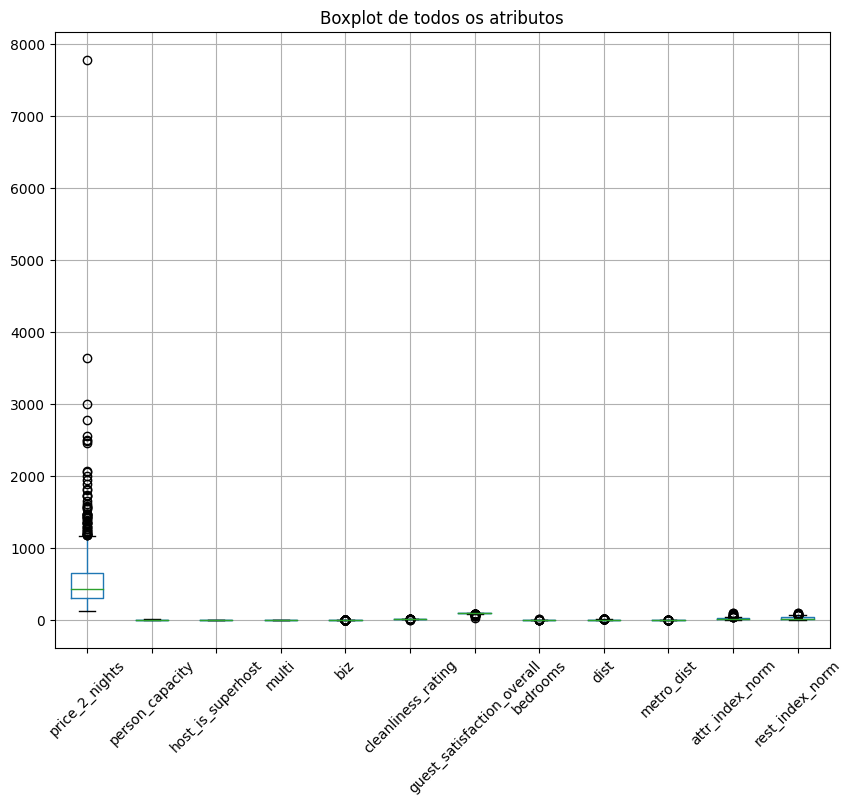

In [ ]:
# Boxplot de todos os tributos | Creating a boxplot for each attribute
df_selected = df_final[attributes]
plt.figure(figsize=(10, 8))
df_selected.boxplot()
plt.title('Boxplot de todos os atributos')
plt.xticks(rotation=45)
plt.show()

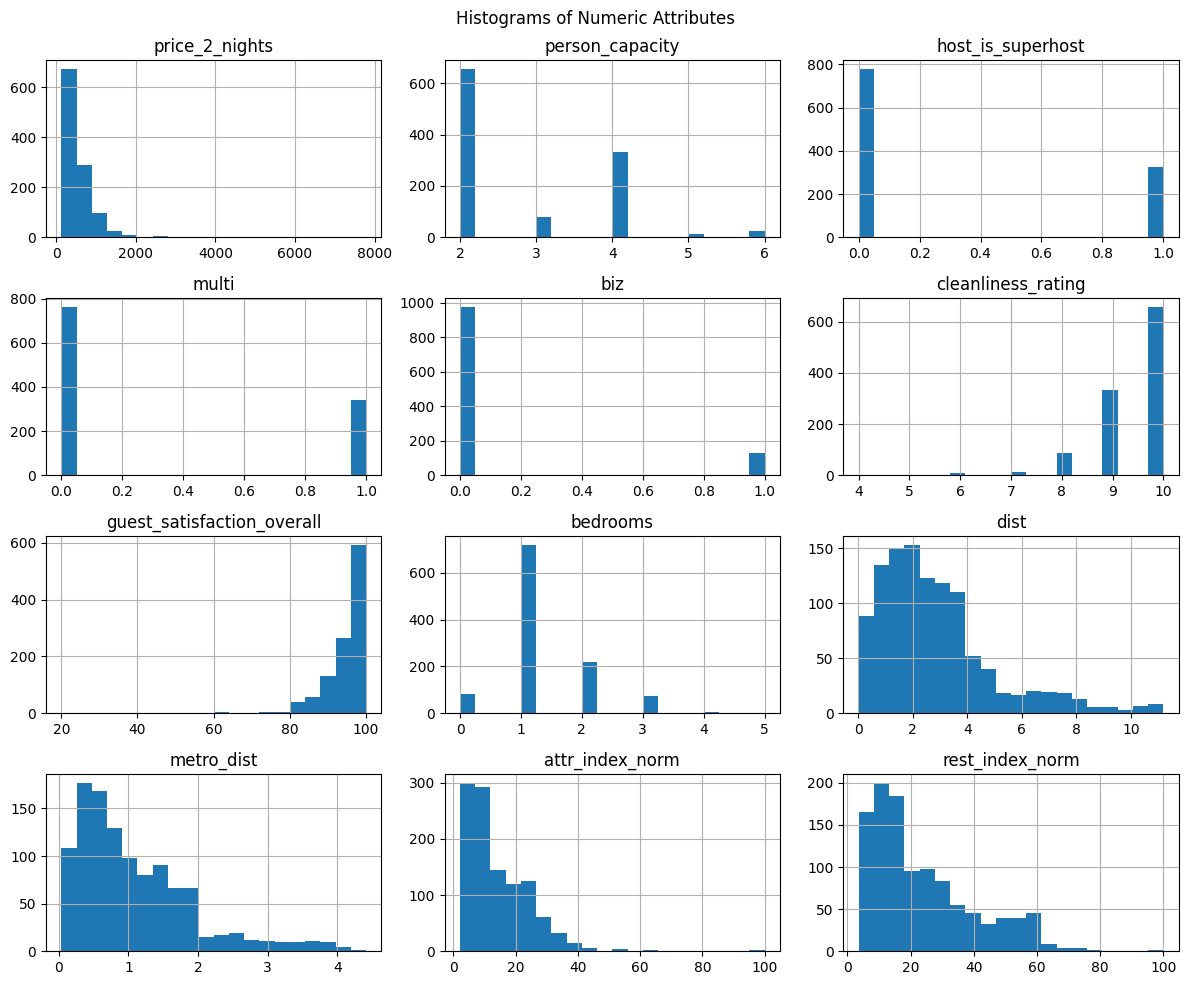

In [ ]:
# Plot de Histograma de todos os atributos | Histogram Plot for each attribute
df_selected.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numeric Attributes')
plt.tight_layout()
plt.show()

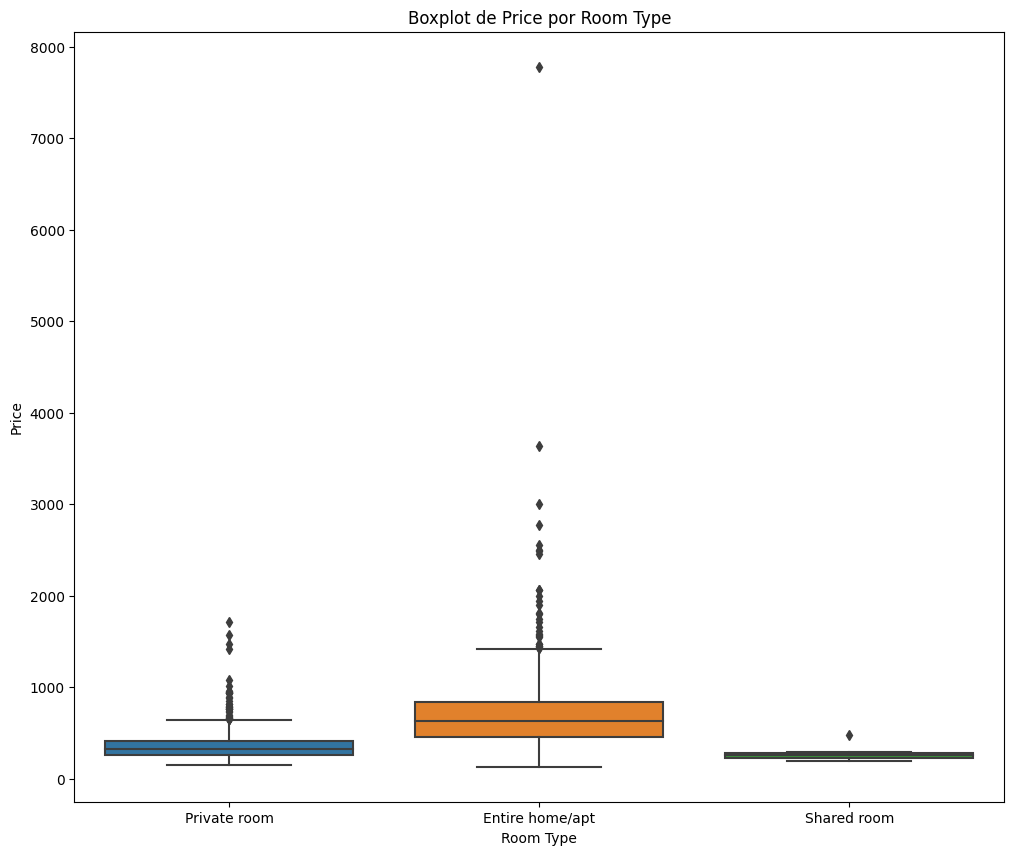

In [ ]:
# BoxPlot com agrupamento e 2 atributos | Creating a boxplot for each attribute with grouping by room type
df_selected_roomType = df_final.copy()
plt.figure(figsize=(12, 10))
sns.boxplot(data=df_selected_roomType, x='room_type', y='price_2_nights')
plt.title('Boxplot de Price por Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

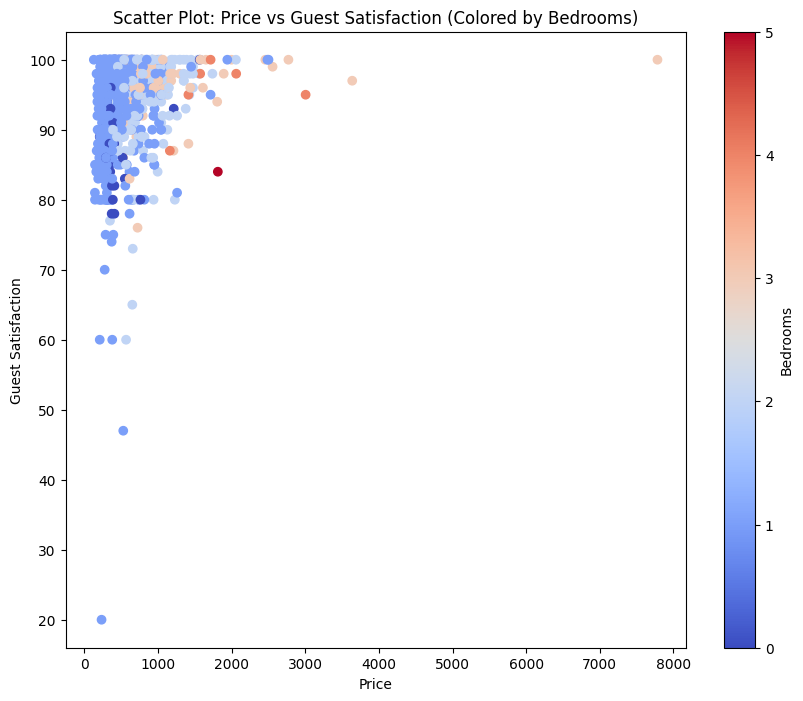

In [ ]:
# Scater plot colorido mapeando o numero de quartos com o indice de satisfação
# Creating a scatter plot with color mapping based on the number of bedrooms
plt.figure(figsize=(10, 8))
plt.scatter(df_selected['price_2_nights'], df_selected['guest_satisfaction_overall'],
            c=df_selected['bedrooms'], cmap='coolwarm')
plt.title('Scatter Plot: Price vs Guest Satisfaction (Colored by Bedrooms)')
plt.xlabel('Price')
plt.ylabel('Guest Satisfaction')
plt.colorbar(label='Bedrooms')
plt.show()

# Adicional Maps exploração | Additional Maps exploraroty

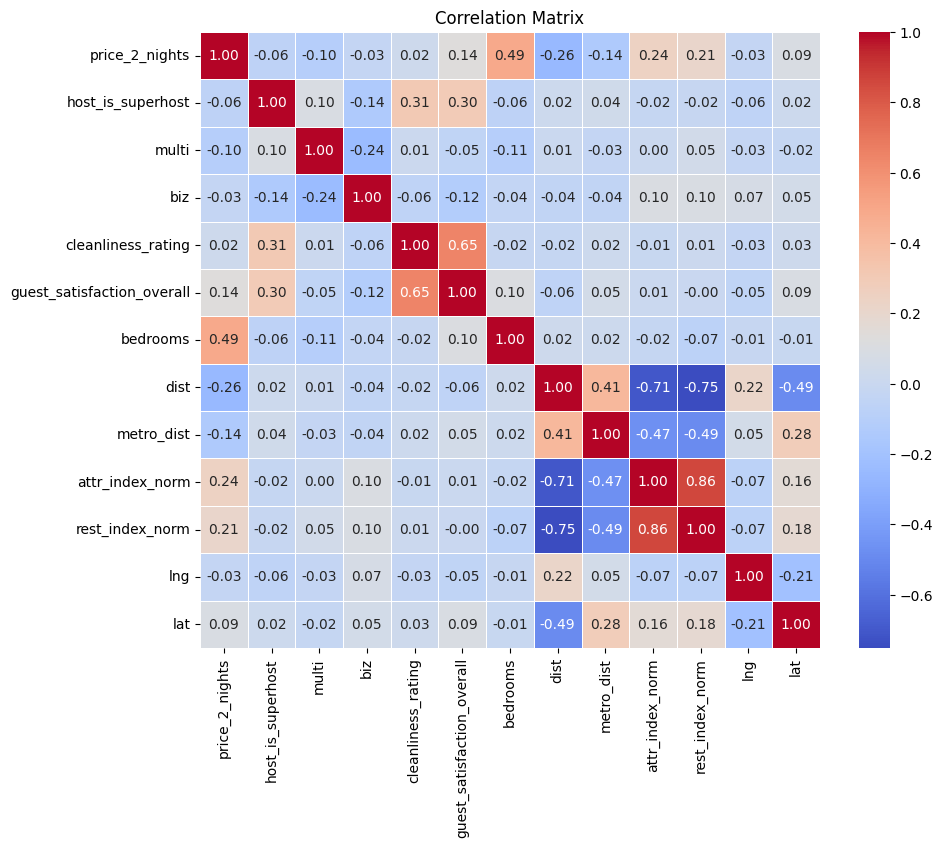

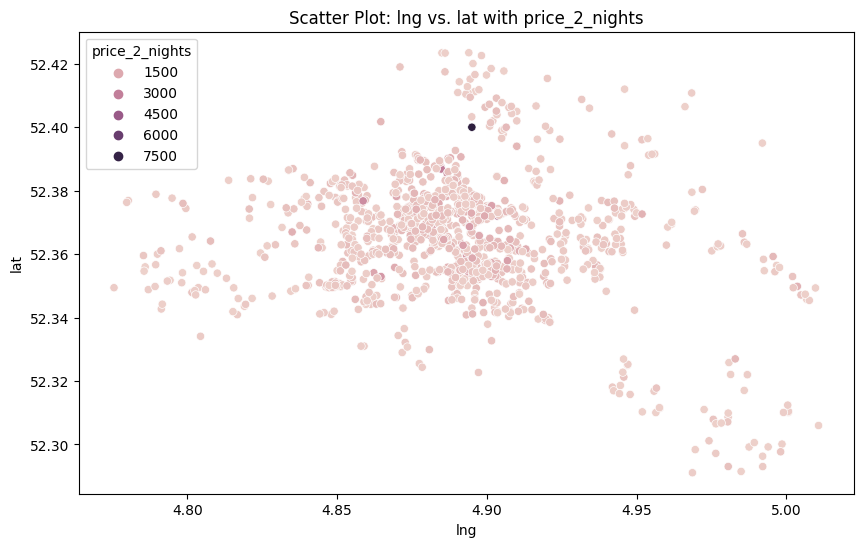

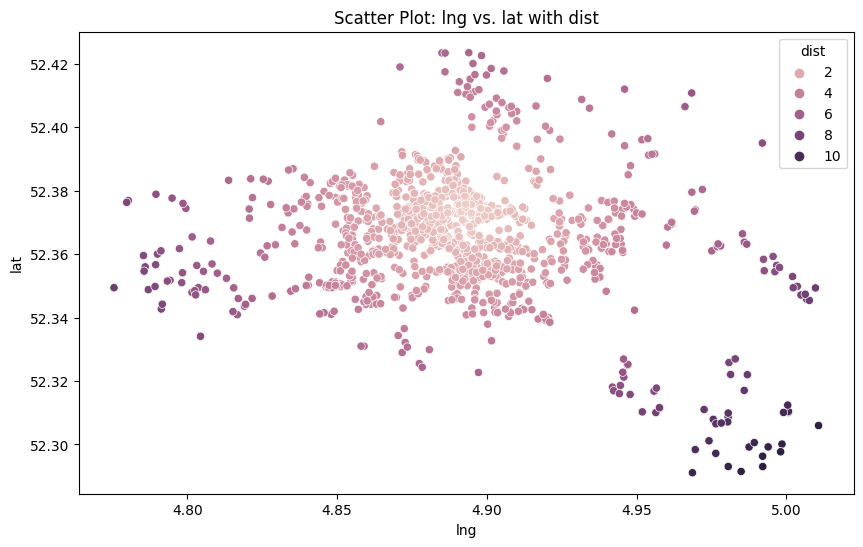

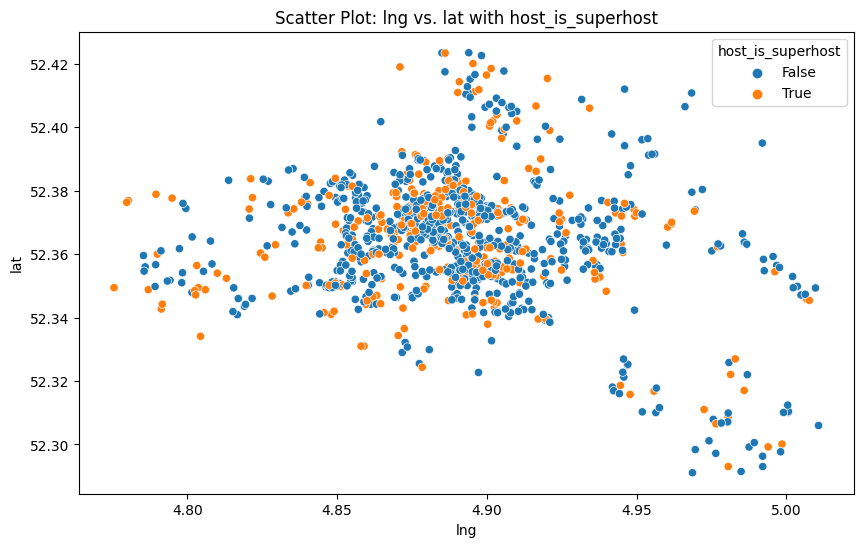

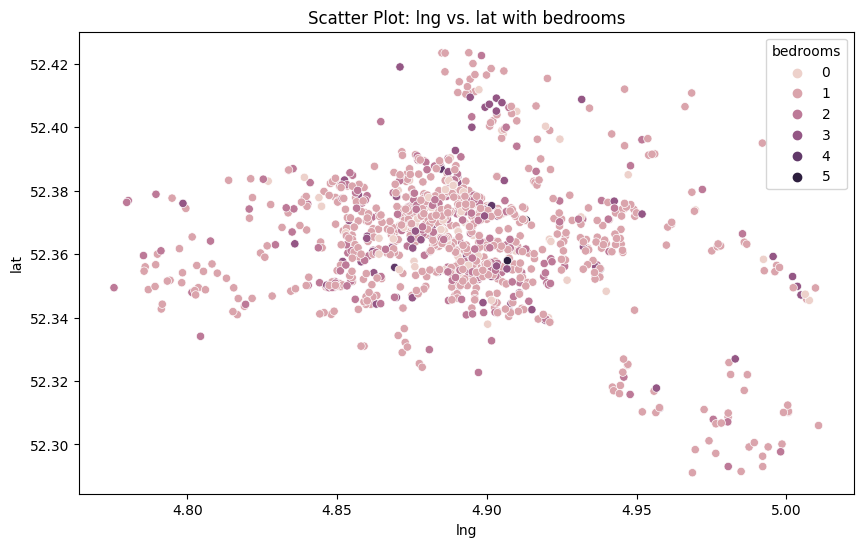

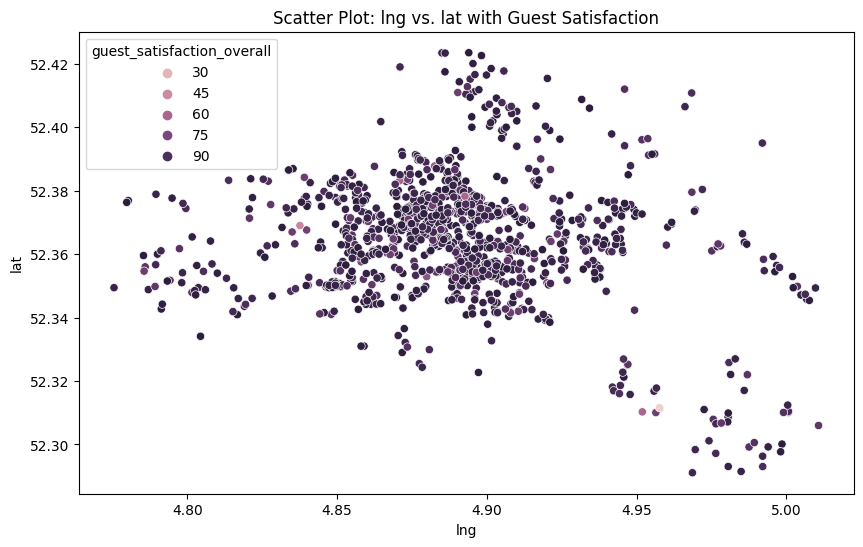

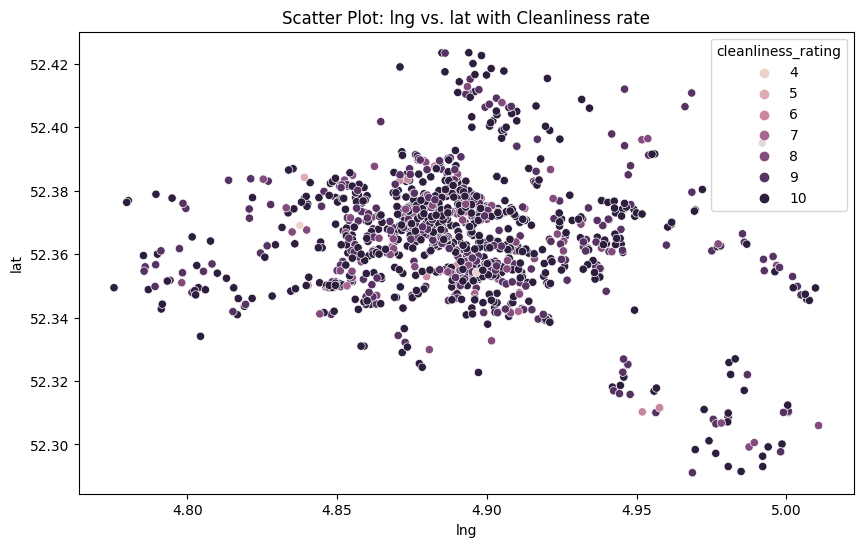

In [ ]:
# Selecting the desired attributes
attributes_maps = ['price_2_nights', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
              'bedrooms', 'dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm', 'lng', 'lat']

# Creating a DataFrame with the selected attributes
df_selected_maps = df_bkp_maps[attributes_maps]

# Calculating the correlation matrix
correlation_matrix_maps = df_selected_maps.corr()

# Creating a correlation matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_maps, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Creating scatter plots for lng and lat
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected_maps, x='lng', y='lat', hue='price_2_nights')
plt.title('Scatter Plot: lng vs. lat with price_2_nights')
plt.show()

# Creating scatter plots for lng and lat
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected_maps, x='lng', y='lat', hue='dist')
plt.title('Scatter Plot: lng vs. lat with dist')
plt.show()

# Creating scatter plots for lng and lat
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected_maps, x='lng', y='lat', hue='host_is_superhost')
plt.title('Scatter Plot: lng vs. lat with host_is_superhost')
plt.show()

# Creating scatter plots for lng and lat
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected_maps, x='lng', y='lat', hue='bedrooms')
plt.title('Scatter Plot: lng vs. lat with bedrooms')
plt.show()

# Creating scatter plots for lng and lat
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected_maps, x='lng', y='lat', hue='guest_satisfaction_overall')
plt.title('Scatter Plot: lng vs. lat with Guest Satisfaction')
plt.show()

# Creating scatter plots for lng and lat
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected_maps, x='lng', y='lat', hue='cleanliness_rating')
plt.title('Scatter Plot: lng vs. lat with Cleanliness rate')
plt.show()

Another plot with MAPS

In [ ]:
# Selecting the desired attributes
attributes_gmaps = ['price_2_nights', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
              'bedrooms', 'dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm', 'lng', 'lat']

# Creating a DataFrame with the selected attributes
df_selected = df_bkp_maps[attributes_gmaps]

# Creating a GeoDataFrame with lng and lat
geometry = gpd.points_from_xy(df_selected['lng'], df_selected['lat'])
gdf = gpd.GeoDataFrame(df_selected, geometry=geometry)

# Creating the base map
m = folium.Map(location=[df_selected['lat'].mean(), df_selected['lng'].mean()], zoom_start=10)

# Adding a marker cluster to the map
marker_cluster = MarkerCluster().add_to(m)

# Iterating over the GeoDataFrame and adding markers to the marker cluster
for idx, row in gdf.iterrows():
    popup_text = f"Price: {row['price_2_nights']}, Bedrooms: {row['bedrooms']}"
    folium.Marker(location=[row['lat'], row['lng']],
                  icon=folium.Icon(color='blue', icon='info-sign'),
                  popup=folium.Popup(popup_text, max_width=200)).add_to(marker_cluster)

# Displaying the map
m


# Conclusão | Conclusion

É possível observar uma correlação do preço e o numero de quartos e um indicativo referente ao preço por noite em combinação de alguns atributos como a distancia do centro da cidade, uma relação entre o numero de atrações e restaurantes na região central, que é reforçado  com o método aplicado de correlação de Pearson, visível no mapa de calor, onde encontrar-se uma possivelcombinação com outros fatores no preço final por 2 noites.

É possivel verificar tmabém que algumas correlações mostram possíveis fatores de convergência entre o anfittrião ser bem avaliado com a avaliação de limpeza e a avaliação de satisfação do cliente.

Apesar de cerca de 90% terem avaliado entre 9 e 10 a limpeza dos imóveis, pode-se observar no boxplot de Violin e na matrix de correlação, que uma combinação dos fatores super anfitrião, avaliação de limpeza, avaliação geral do usuário e a distância relativo ao centro  e aos restaurantes tendem a ter melhores indicadores positivos.
  



